In [93]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno

In [94]:
train_df = pd.read_csv("data/train.csv")
test_df = pd.read_csv("data/test.csv")

In [95]:
print(train_df.shape)
print("train= ",train_df.info())
train_df.head()

(891, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
train=  None


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [96]:
print(test_df.shape)
print("test= ",test_df.info())
test_df.head()

(418, 11)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB
test=  None


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [97]:
# survived = 0 - d , 1 - alive
# pclass = Ticket class
# sibsp = Wife, uncle, etc. on Titanic. If it's zero, you'll be alone.
# parch = parent + childer
# embarked  = port of Embarktion

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


Text(0.5, 1.0, 'Train set')

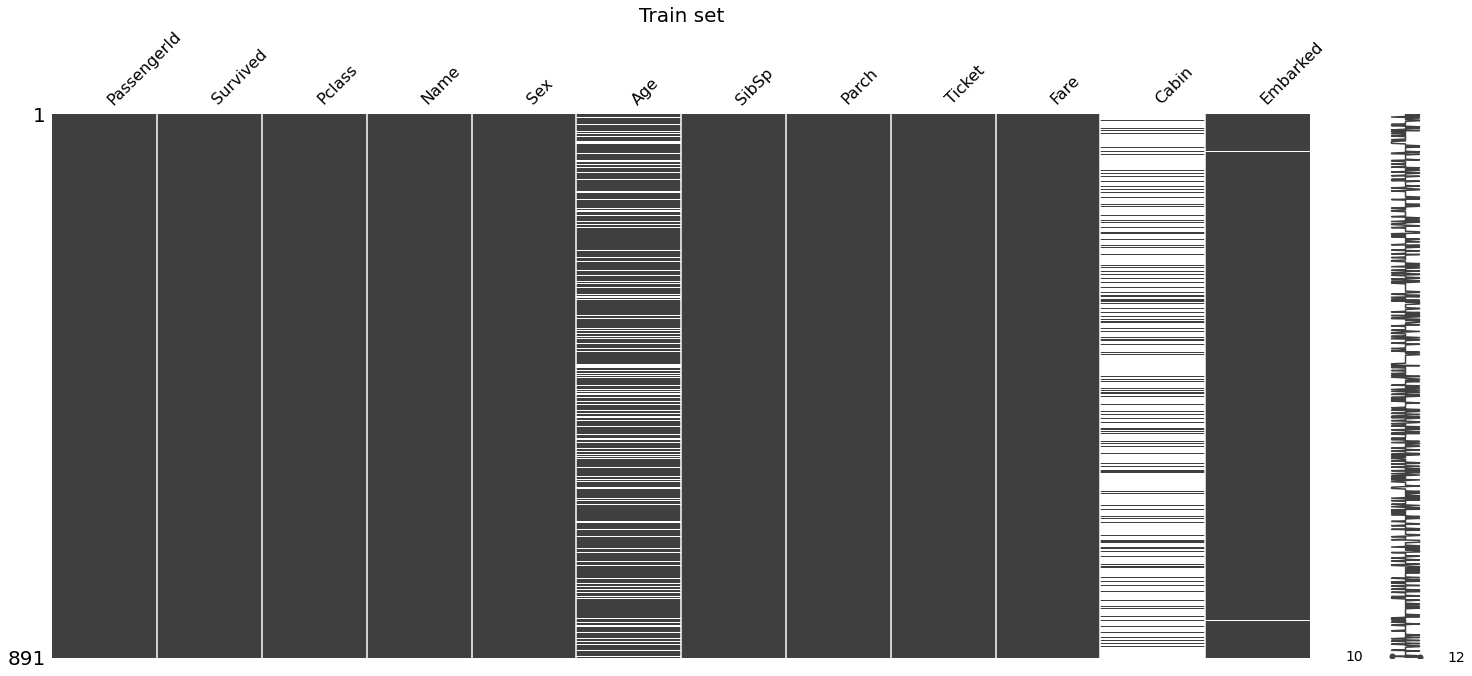

In [98]:
print(train_df.isnull().sum())
msno.matrix(train_df).set_title("Train set",fontsize=20)

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


Text(0.5, 1.0, 'Train set')

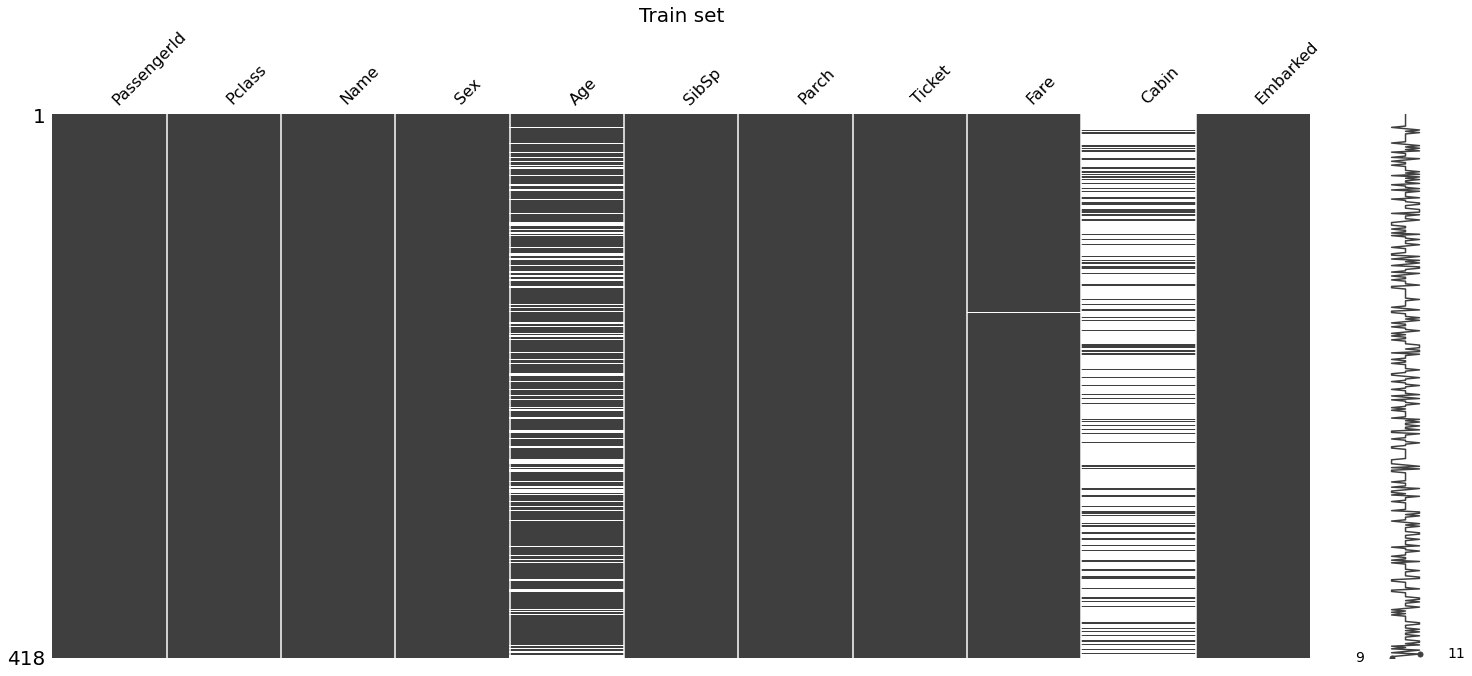

In [99]:
print(test_df.isnull().sum())
msno.matrix(test_df).set_title("Train set",fontsize=20)

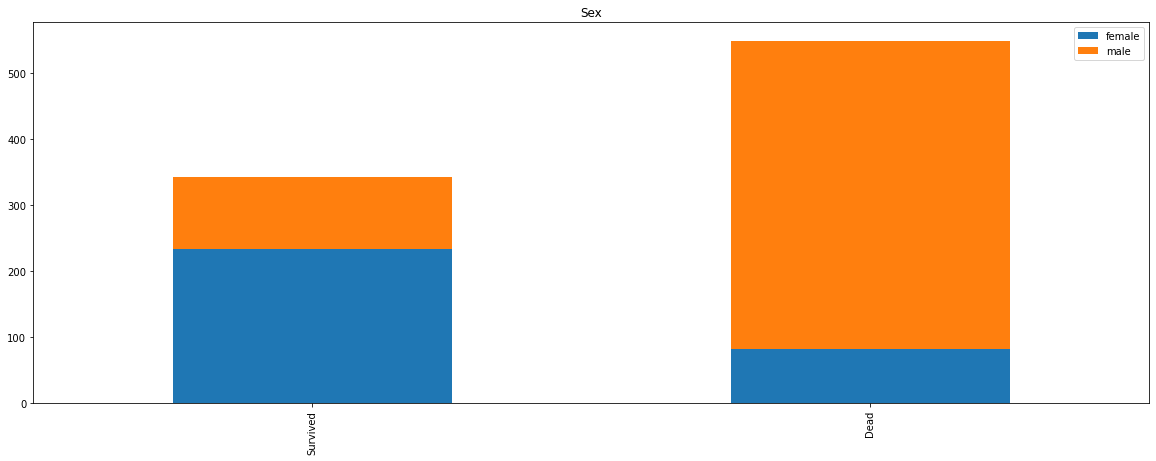

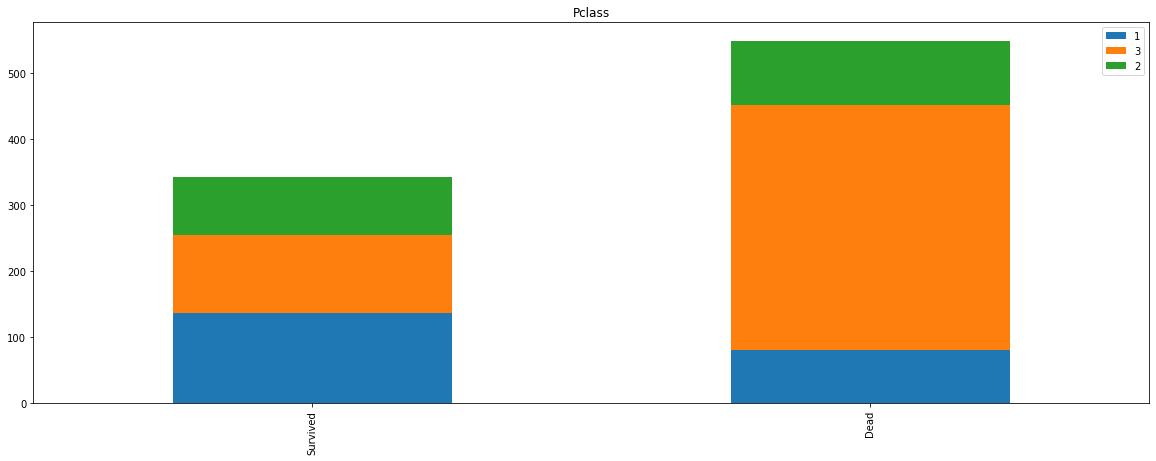

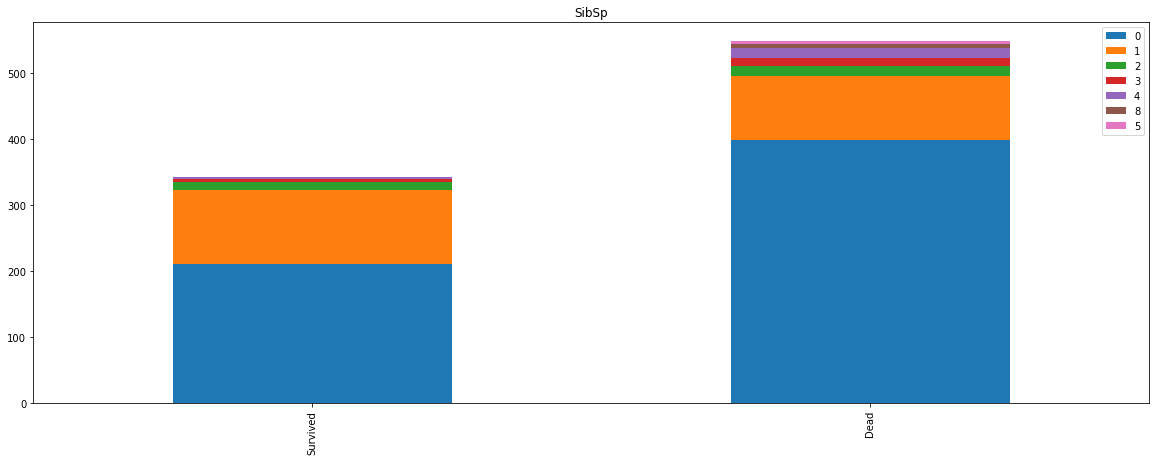

In [103]:
def bar_chart(feature):
    survived = train_df[train_df["Survived"]==1][feature].value_counts()
    dead = train_df[train_df["Survived"]==0][feature].value_counts()
    df = pd.DataFrame([survived,dead])
    df.index = ["Survived","Dead"]
    df.plot(kind="bar",stacked=True, figsize=(20,7),title=feature)
for a in ["Sex","Pclass","SibSp"]:
    bar_chart(a)

In [47]:
# We see the features that for death of service

In [48]:
# Now we want to add a new feature, Title. we will get it from the names

In [104]:
train_test_df = [train_df,test_df]

for dataset in train_test_df:
    dataset["Title"] = dataset["Name"].str.extract('([A-Za-z]+)\.',expand=False)

In [105]:
train_df["Title"]

0        Mr
1       Mrs
2      Miss
3       Mrs
4        Mr
       ... 
886     Rev
887    Miss
888    Miss
889      Mr
890      Mr
Name: Title, Length: 891, dtype: object

In [106]:
train_df["Title"].value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Major         2
Col           2
Countess      1
Capt          1
Ms            1
Sir           1
Lady          1
Mme           1
Don           1
Jonkheer      1
Name: Title, dtype: int64

<AxesSubplot:>

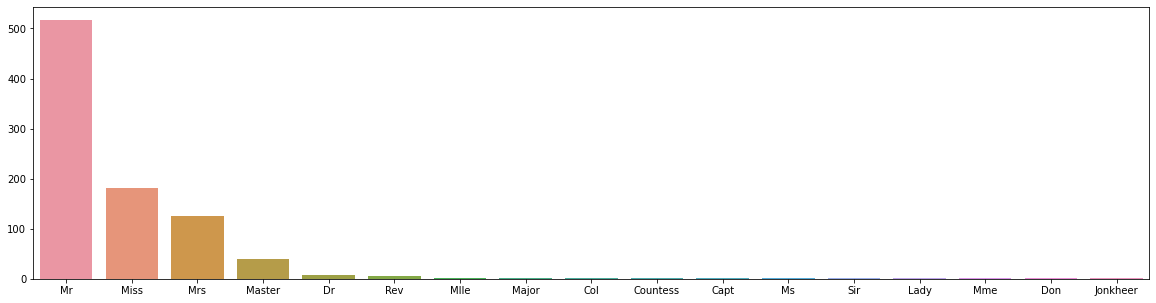

In [107]:
title = train_df["Title"].value_counts()
plt.figure(figsize =(20,5))
sns.barplot(x = title.index, y = title.values)

In [108]:
# Now we will map strings to values 

In [109]:
title_mapping = {
    'Mr': 0, "Miss":1,"Mrs":2,"Master":3,"Dr":3,"Rev":3,"Col":3,"Major":3,"Mile":3,"Countess":3,"Ms":3,"Lady":3,"Johnkheer":3,"Don":3,"Dona":3,"Mme":3,"Capt":3,"Sir":3
}

for dataset in train_test_df:
    dataset["Title"] = dataset["Title"].map(title_mapping)

In [110]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2.0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0.0


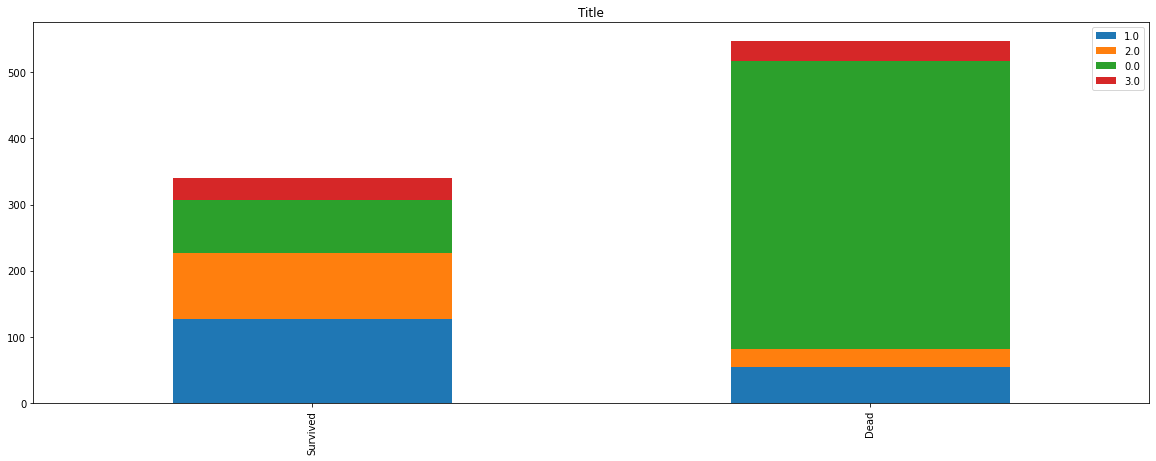

In [111]:
bar_chart("Title")

In [112]:
sex_mapping = {"male":0,"female":1}
for dataset in train_test_df:
    dataset["Sex"] = dataset["Sex"].map(sex_mapping)

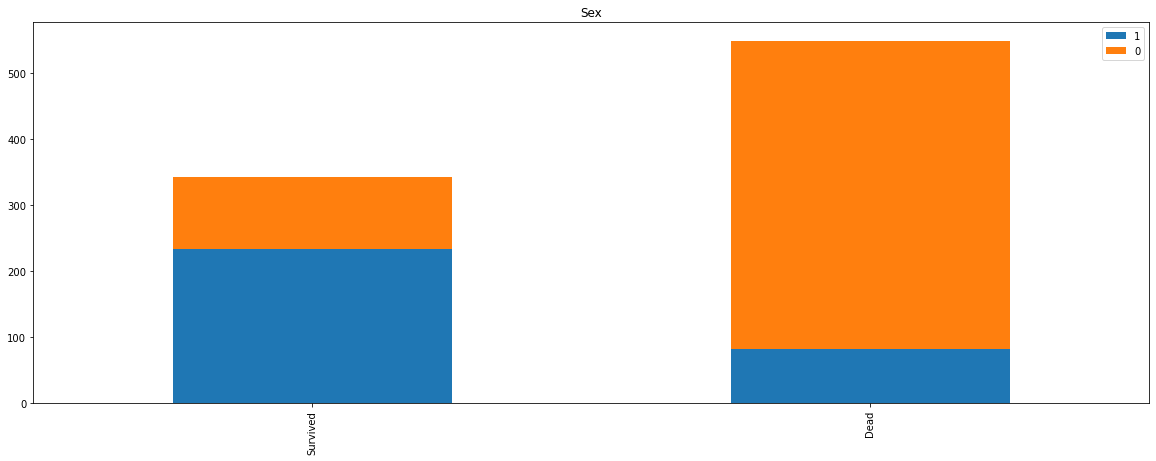

In [113]:
bar_chart("Sex")

In [114]:
train_df["Age"].fillna(train_df.groupby('Title')['Age'].transform("median"),inplace=True)
test_df["Age"].fillna(test_df.groupby('Title')['Age'].transform("median"),inplace=True)

/home/zouinkhim/miniconda3/envs/tf-gpu/lib/python3.9/site-packages/seaborn/axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
/home/zouinkhim/miniconda3/envs/tf-gpu/lib/python3.9/site-packages/seaborn/axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)


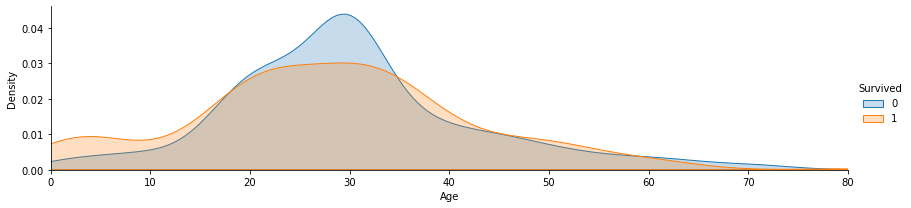

In [115]:
facet = sns.FacetGrid(train_df, hue="Survived",aspect=4)
facet.map(sns.kdeplot,"Age",shade=True)
facet.set(xlim=(0,train_df['Age'].max()))
facet.add_legend()

plt.show()

/home/zouinkhim/miniconda3/envs/tf-gpu/lib/python3.9/site-packages/seaborn/axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
/home/zouinkhim/miniconda3/envs/tf-gpu/lib/python3.9/site-packages/seaborn/axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)


(0.0, 20.0)

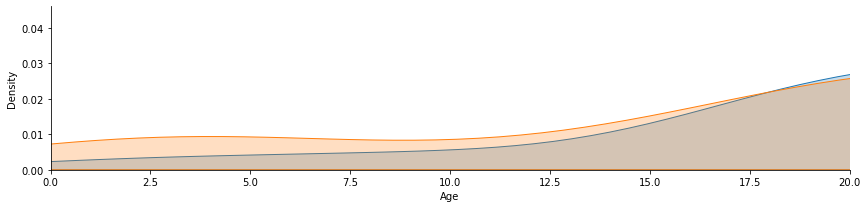

In [116]:
# visualization death - age, age between 0~20 years old
facet = sns.FacetGrid(train_df, hue="Survived", aspect=4)
facet.map(sns.kdeplot,"Age",shade=True)
facet.set(xlim=(0,train_df["Age"].max())) # to use xlim, limitation age's range
plt.xlim(0,20) # to limitation X boundary, we can see the graph more specifically

In [117]:
train_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S,0.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C,2.0
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S,2.0
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",0,27.0,0,0,211536,13.0000,NaN,S,3.0
887,888,1,1,"Graham, Miss. Margaret Edith",1,19.0,0,0,112053,30.0000,B42,S,1.0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",1,21.0,1,2,W./C. 6607,23.4500,NaN,S,1.0
889,890,1,1,"Behr, Mr. Karl Howell",0,26.0,0,0,111369,30.0000,C148,C,0.0


In [118]:
df_2 = train_df["Age"]
df_2 = pd.DataFrame(df_2)
df_2.columns=["Age"]
for i in range(891):
    a = df_2['Age'].get(i)
    if int(a) <= 16:
        df_2['Age'][i] = 0
    elif int(a) > 16 and a <=26:
        df_2['Age'][i] = 1
    elif int(a) > 26 and a <= 36:
        df_2['Age'][i] = 2
    elif int(a) >36 and a <= 64:
        df_2["Age"][i] = 3
    else:
        df_2['Age'][i] = 4
        
train_df["Age"] = df_2["Age"]
train_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",0,1.0,1,0,A/5 21171,7.2500,NaN,S,0.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,3.0,1,0,PC 17599,71.2833,C85,C,2.0
2,3,1,3,"Heikkinen, Miss. Laina",1,1.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,2.0,1,0,113803,53.1000,C123,S,2.0
4,5,0,3,"Allen, Mr. William Henry",0,2.0,0,0,373450,8.0500,NaN,S,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",0,2.0,0,0,211536,13.0000,NaN,S,3.0
887,888,1,1,"Graham, Miss. Margaret Edith",1,1.0,0,0,112053,30.0000,B42,S,1.0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",1,1.0,1,2,W./C. 6607,23.4500,NaN,S,1.0
889,890,1,1,"Behr, Mr. Karl Howell",0,1.0,0,0,111369,30.0000,C148,C,0.0


In [119]:
df_2 = test_df["Age"]
df_2 = pd.DataFrame(df_2)
df_2.columns=["Age"]
for i in range(418):
    a = df_2['Age'].get(i)
    if int(a) <= 16:
        df_2['Age'][i] = 0
    elif int(a) > 16 and a <=26:
        df_2['Age'][i] = 1
    elif int(a) > 26 and a <= 36:
        df_2['Age'][i] = 2
    elif int(a) >36 and a < 64:
        df_2["Age"][i] = 3
    else:
        df_2['Age'][i] = 4
test_df["Age"] = df_2["Age"]
test_df

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,892,3,"Kelly, Mr. James",0,2.0,0,0,330911,7.8292,NaN,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",1,3.0,1,0,363272,7.0000,NaN,S,2
2,894,2,"Myles, Mr. Thomas Francis",0,3.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,"Wirz, Mr. Albert",0,2.0,0,0,315154,8.6625,NaN,S,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,1.0,1,1,3101298,12.2875,NaN,S,2
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",0,2.0,0,0,A.5. 3236,8.0500,NaN,S,0
414,1306,1,"Oliva y Ocana, Dona. Fermina",1,3.0,0,0,PC 17758,108.9000,C105,C,3
415,1307,3,"Saether, Mr. Simon Sivertsen",0,3.0,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,0
416,1308,3,"Ware, Mr. Frederick",0,2.0,0,0,359309,8.0500,NaN,S,0


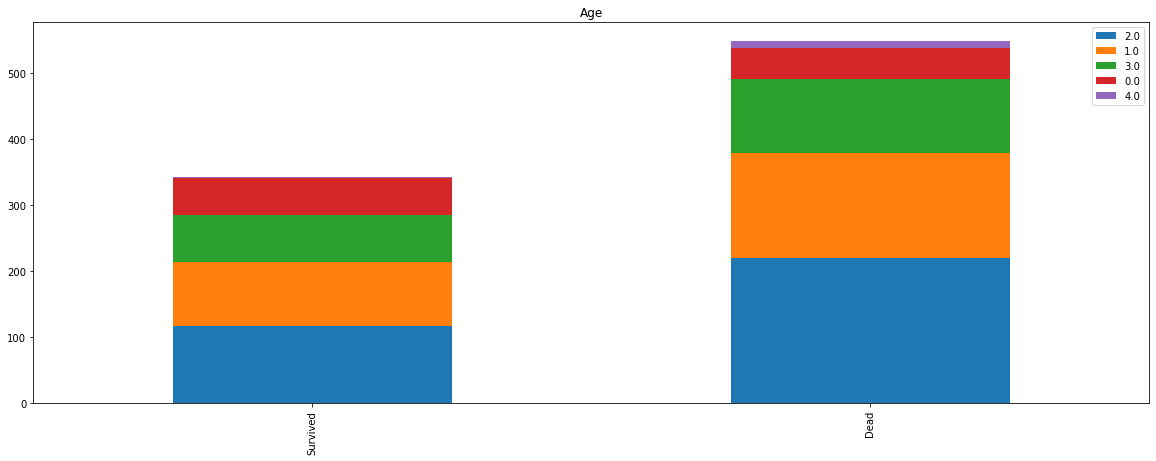

In [120]:
bar_chart("Age")

<AxesSubplot:>

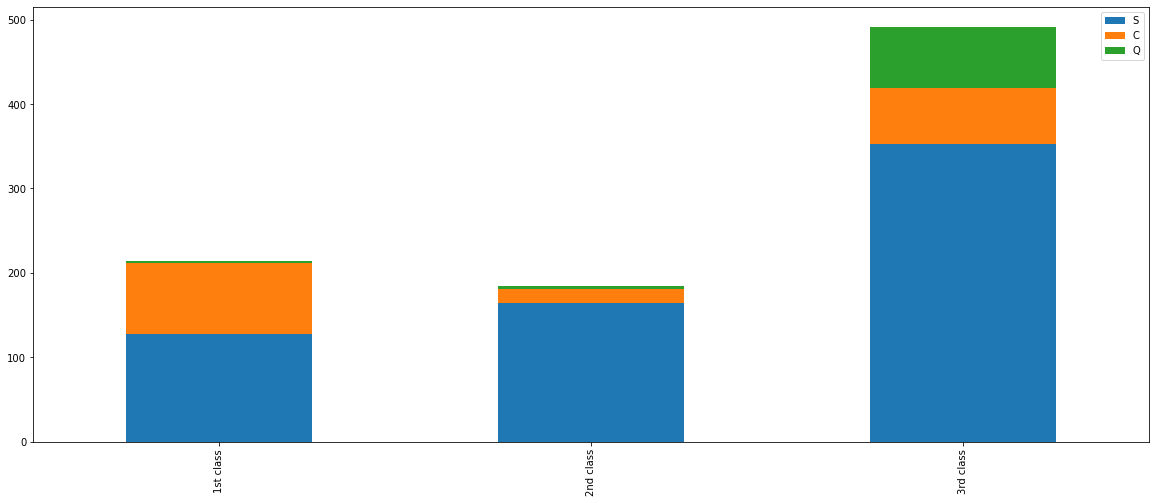

In [121]:
pclass1 = train_df[train_df["Pclass"]==1]["Embarked"].value_counts() # the place where a first-class person got off
pclass2 = train_df[train_df["Pclass"]==2]["Embarked"].value_counts() # the place where a second-class person got off
pclass3 = train_df[train_df["Pclass"]==3]["Embarked"].value_counts() # the place where a third-class person got off
df = pd.DataFrame([pclass1,pclass2,pclass3])
df.index = ["1st class","2nd class","3rd class"]
df.plot(kind="bar",stacked = True, figsize=(20,8))

In [122]:
for dataset in train_test_df:
    dataset["Embarked"] = dataset['Embarked'].fillna("S")
# fill "S" in blanked "Embarked" row
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",0,1.0,1,0,A/5 21171,7.2500,NaN,S,0.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,3.0,1,0,PC 17599,71.2833,C85,C,2.0
2,3,1,3,"Heikkinen, Miss. Laina",1,1.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,2.0,1,0,113803,53.1000,C123,S,2.0
4,5,0,3,"Allen, Mr. William Henry",0,2.0,0,0,373450,8.0500,NaN,S,0.0


In [123]:
embarked_mapping = {"S":0,"C":1,"Q":2} # do mapping(test - number) in embarked row, for more convinence in machine learning
for dataset in train_test_df:
    dataset["Embarked"] = dataset["Embarked"].map(embarked_mapping)

In [124]:
train_df["Fare"].fillna(train_df.groupby("Pclass")["Fare"].transform("median"),inplace=True)
test_df["Fare"].fillna(test_df.groupby("Pclass")["Fare"].transform("median"),inplace=True)

/home/zouinkhim/miniconda3/envs/tf-gpu/lib/python3.9/site-packages/seaborn/axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
/home/zouinkhim/miniconda3/envs/tf-gpu/lib/python3.9/site-packages/seaborn/axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)


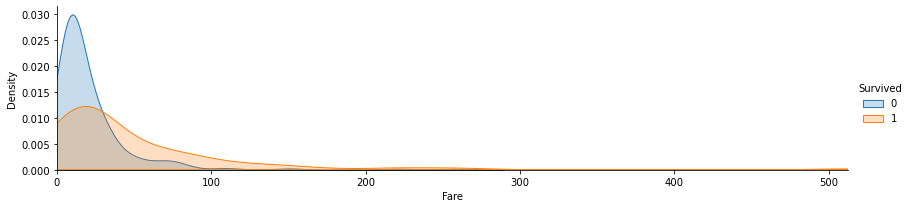

In [125]:
facet = sns.FacetGrid(train_df,hue="Survived",aspect=4)
facet.map(sns.kdeplot,"Fare",shade=True)
facet.set(xlim=(0,train_df["Fare"].max()))
facet.add_legend()

/home/zouinkhim/miniconda3/envs/tf-gpu/lib/python3.9/site-packages/seaborn/axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
/home/zouinkhim/miniconda3/envs/tf-gpu/lib/python3.9/site-packages/seaborn/axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)


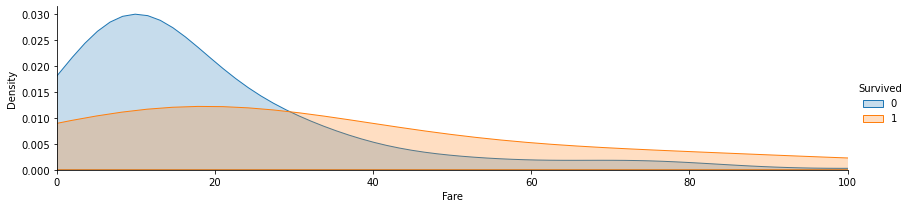

In [126]:
facet = sns.FacetGrid(train_df,hue="Survived",aspect=4)
facet.map(sns.kdeplot,"Fare",shade=True)
facet.set(xlim=(0,100))
facet.add_legend()

In [127]:
df_2 = train_df["Fare"]
df_2 = pd.DataFrame(df_2)
df_2.columns=["Fare"]
for i in range(891):
    a = df_2['Fare'].get(i)
    if int(a) <= 8:
        df_2['Fare'][i] = 0
    elif int(a) > 8 and a <=17:
        df_2['Fare'][i] = 1
    elif int(a) > 17 and a <= 27:
        df_2['Fare'][i] = 2
    elif int(a) >27 and a < 37:
        df_2["Fare"][i] = 3
    else:
        df_2['Fare'][i] = 4
train_df["Fare"] = df_2["Fare"]
train_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",0,1.0,1,0,A/5 21171,0.0,NaN,0,0.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,3.0,1,0,PC 17599,4.0,C85,1,2.0
2,3,1,3,"Heikkinen, Miss. Laina",1,1.0,0,0,STON/O2. 3101282,0.0,NaN,0,1.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,2.0,1,0,113803,4.0,C123,0,2.0
4,5,0,3,"Allen, Mr. William Henry",0,2.0,0,0,373450,0.0,NaN,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",0,2.0,0,0,211536,1.0,NaN,0,3.0
887,888,1,1,"Graham, Miss. Margaret Edith",1,1.0,0,0,112053,3.0,B42,0,1.0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",1,1.0,1,2,W./C. 6607,2.0,NaN,0,1.0
889,890,1,1,"Behr, Mr. Karl Howell",0,1.0,0,0,111369,3.0,C148,1,0.0


In [128]:
df_2 = test_df["Fare"]
df_2 = pd.DataFrame(df_2)
df_2.columns=["Fare"]
for i in range(418):
    a = df_2['Fare'].get(i)
    if int(a) <= 8:
        df_2['Fare'][i] = 0
    elif int(a) > 8 and a <=17:
        df_2['Fare'][i] = 1
    elif int(a) > 17 and a <= 27:
        df_2['Fare'][i] = 2
    elif int(a) >27 and a < 37:
        df_2["Fare"][i] = 3
    else:
        df_2['Fare'][i] = 4
test_df["Fare"] = df_2["Fare"]
test_df

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,892,3,"Kelly, Mr. James",0,2.0,0,0,330911,0.0,NaN,2,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",1,3.0,1,0,363272,0.0,NaN,0,2
2,894,2,"Myles, Mr. Thomas Francis",0,3.0,0,0,240276,1.0,NaN,2,0
3,895,3,"Wirz, Mr. Albert",0,2.0,0,0,315154,0.0,NaN,0,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,1.0,1,1,3101298,1.0,NaN,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",0,2.0,0,0,A.5. 3236,0.0,NaN,0,0
414,1306,1,"Oliva y Ocana, Dona. Fermina",1,3.0,0,0,PC 17758,4.0,C105,1,3
415,1307,3,"Saether, Mr. Simon Sivertsen",0,3.0,0,0,SOTON/O.Q. 3101262,0.0,NaN,0,0
416,1308,3,"Ware, Mr. Frederick",0,2.0,0,0,359309,0.0,NaN,0,0


C    59
B    47
D    29
E    25
A    15
T     1
Name: Cabin, dtype: int64


<AxesSubplot:>

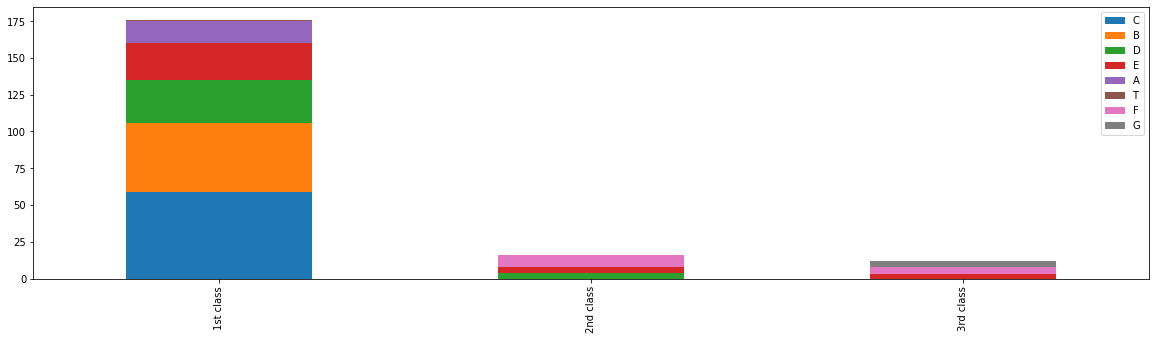

In [129]:
for dataset in train_test_df:
    dataset["Cabin"] = dataset["Cabin"].str[:1]

pclass1 = train_df[train_df["Pclass"]==1]["Cabin"].value_counts() #1등급인 사람들의 객실수
pclass2 = train_df[train_df["Pclass"]==2]["Cabin"].value_counts() #2등급인 사람들의 객실수
pclass3 = train_df[train_df["Pclass"]==3]["Cabin"].value_counts() #3등급인 사람들의 객실수
print(pclass1)

df = pd.DataFrame([pclass1,pclass2,pclass3])
df.index = ["1st class","2nd class","3rd class"]
df.plot(kind="bar",stacked = True, figsize=(20,5))

In [131]:
cabin_mapping = {"A":0,"B":0.4,"C":0.8,"D":1.2,"E":1.6,"F":2,"G":2.4,"T":2.8} # do mapping, 
# If the range of numbers is not similar, the larger range can be considered more important.
# So I'm going to divide it up to a decimal place and give it a similar range.
# it called feature scaling.
for dataset in train_test_df:
    dataset["Cabin"] = dataset["Cabin"].map(cabin_mapping)

In [132]:
train_df["Cabin"].fillna(train_df.groupby("Pclass")["Cabin"].transform("median"),inplace=True)
test_df["Cabin"].fillna(test_df.groupby("Pclass")["Cabin"].transform("median"),inplace=True)

In [133]:
train_df["FamilySize"] = train_df["SibSp"] + train_df["Parch"] + 1
test_df["FamilySize"] = test_df['SibSp'] + test_df["Parch"] + 1

/home/zouinkhim/miniconda3/envs/tf-gpu/lib/python3.9/site-packages/seaborn/axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
/home/zouinkhim/miniconda3/envs/tf-gpu/lib/python3.9/site-packages/seaborn/axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)


(-3.0, 11.0)

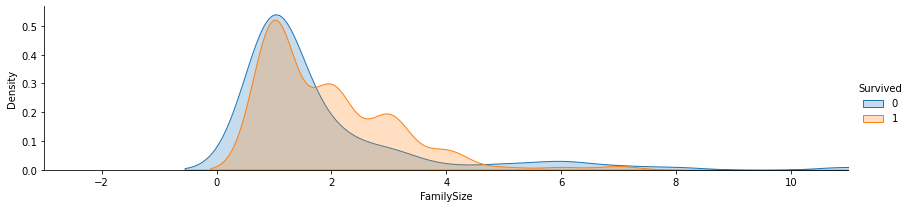

In [134]:
facet = sns.FacetGrid(train_df,hue="Survived",aspect=4)
facet.map(sns.kdeplot,"FamilySize",shade=True)
facet.set(xlim=(0,train_df["FamilySize"].max()))
facet.add_legend()
plt.xlim(-3)

In [135]:
family_mapping = {1:0,2:0.4,3:0.8,4:1.2,5:1.6 , 6:2 , 7:2.4 , 8:2.8, 9:3.2 , 10:3.6 , 11:4}
for dataset in train_test_df:
    dataset["FamilySize"] = dataset["FamilySize"].map(family_mapping)

In [136]:
train_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,FamilySize
0,1,0,3,"Braund, Mr. Owen Harris",0,1.0,1,0,A/5 21171,0.0,2.0,0,0.0,0.4
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,3.0,1,0,PC 17599,4.0,0.8,1,2.0,0.4
2,3,1,3,"Heikkinen, Miss. Laina",1,1.0,0,0,STON/O2. 3101282,0.0,2.0,0,1.0,0.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,2.0,1,0,113803,4.0,0.8,0,2.0,0.4
4,5,0,3,"Allen, Mr. William Henry",0,2.0,0,0,373450,0.0,2.0,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",0,2.0,0,0,211536,1.0,1.8,0,3.0,0.0
887,888,1,1,"Graham, Miss. Margaret Edith",1,1.0,0,0,112053,3.0,0.4,0,1.0,0.0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",1,1.0,1,2,W./C. 6607,2.0,2.0,0,1.0,1.2
889,890,1,1,"Behr, Mr. Karl Howell",0,1.0,0,0,111369,3.0,0.8,1,0.0,0.0


In [137]:
drop_list = ["Ticket","SibSp","Parch","Name"]
train_df = train_df.drop(drop_list, axis=1)
test_df = test_df.drop(drop_list, axis=1)
train_df = train_df.drop(["PassengerId"], axis=1)

In [138]:
train_df

,Survived,Pclass,Sex,Age,Fare,Cabin,Embarked,Title,FamilySize
0,0,3,0,1.0,0.0,2.0,0,0.0,0.4
1,1,1,1,3.0,4.0,0.8,1,2.0,0.4
2,1,3,1,1.0,0.0,2.0,0,1.0,0.0
3,1,1,1,2.0,4.0,0.8,0,2.0,0.4
4,0,3,0,2.0,0.0,2.0,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
886,0,2,0,2.0,1.0,1.8,0,3.0,0.0
887,1,1,1,1.0,3.0,0.4,0,1.0,0.0
888,0,3,1,1.0,2.0,2.0,0,1.0,1.2
889,1,1,0,1.0,3.0,0.8,1,0.0,0.0


In [139]:
train_data = train_df.drop("Survived", axis = 1)
target = train_df["Survived"]

train_data.fillna(0)
pd.DataFrame(train_data.isnull().value_counts())
a = pd.DataFrame(train_data["Title"]).fillna(0)
pd.DataFrame(train_data["Title"]).isnull().value_counts()
a.isnull().value_counts()
train_data["Title"] = a["Title"]
pd.DataFrame(train_data["Title"]).isnull().value_counts()

Title
False    891
dtype: int64

In [140]:
train_df

,Survived,Pclass,Sex,Age,Fare,Cabin,Embarked,Title,FamilySize
0,0,3,0,1.0,0.0,2.0,0,0.0,0.4
1,1,1,1,3.0,4.0,0.8,1,2.0,0.4
2,1,3,1,1.0,0.0,2.0,0,1.0,0.0
3,1,1,1,2.0,4.0,0.8,0,2.0,0.4
4,0,3,0,2.0,0.0,2.0,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
886,0,2,0,2.0,1.0,1.8,0,3.0,0.0
887,1,1,1,1.0,3.0,0.4,0,1.0,0.0
888,0,3,1,1.0,2.0,2.0,0,1.0,1.2
889,1,1,0,1.0,3.0,0.8,1,0.0,0.0


In [144]:
train_df.to_csv("data/formatted_train.csv")

In [145]:
test_df.to_csv("data/formatted_test.csv")